# Coding Etiquette

In [1]:
# This script contains the following directions
# 1. Data Security
# 2. Create a regional column from the state data
# 3. Creating list of High and Low customers activity
# 4. Adding the income column to the dataframe
# 5. Marketing Strategy: Customers profiling
# 6. Create visualization\n",
# 7. Aggregating the  customers profile level for frequency and expenditure
# 8. Compare your customer profiles with regions and departments

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\klein\Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\klein\\Instacart Basket Analysis'

In [5]:
#Import customers and products data
customers_products = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.pkl'))

In [6]:
customers_products.head()

,Unnamed: 0.1,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,...,order_frequency,first name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,False,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,False,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,False,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,False,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
customers_products = customers_products.drop(columns = ['eval_set'])

In [8]:
customers_products.shape

(32404859, 35)

In [9]:
# 1. Data Security

# The customers dataset, which was merged with the df_ords_orods dataframe, contained personally identifiable information (PII) in the form of first and last names and can be traced back to a particular person. 
# However, i decided to drop these columns as part of the data cleansing process of the customers dataset. There is no other PII in the consumers_products dataframe. All data has been stored and accessed safely, 
# and no sensitive information has been distributed outside of the network

In [10]:
# Dropping PII columns
new_customers_products= customers_products.drop(['first name', 'surname'], axis=1)

In [11]:
new_customers_products.head()

,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,spending_habit,median_order_duration,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income
0,0,2539329,1,1,2,8,NaN,True,196,1,...,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,False,196,1,...,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,False,196,1,...,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,False,196,1,...,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,False,196,1,...,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [12]:
# 2. Create a regional column from the state data

In [13]:
# create a flag for Northeast region in region column
new_customers_products.loc[new_customers_products['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [14]:
# create a flag for Midwest region in new region column
new_customers_products.loc[new_customers_products['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [15]:
# create a flag for South region in new region column
new_customers_products.loc[new_customers_products['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [16]:
# create a flag for West region in new region column
new_customers_products.loc[new_customers_products['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [17]:
new_customers_products['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [18]:
# remove row limit to enable the checkthrough of the data
pd.options.display.max_rows = None

In [19]:
# Head results for user_id, state and region.
new_customers_products[['user_id', 'state', 'region']].head()

,user_id,state,region
0,1,Alabama,South
1,1,Alabama,South
2,1,Alabama,South
3,1,Alabama,South
4,1,Alabama,South


In [20]:
 #Determine whether there is difference in spending hadbit of each region
crosstab_region_spenders_type = pd.crosstab(new_customers_products['region'], new_customers_products['spending_habit'], dropna = False)

In [21]:
crosstab_region_spenders_type

spending_habit,Higher spender,Lower spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [22]:
#copy to Clipboard
crosstab_region_spenders_type.to_clipboard()

In [23]:
# Create exclusion flag for low-activity customers

In [24]:
# create a flag for low-activity customers based on less than 5 orders
new_customers_products.loc[new_customers_products['max_order'] < 5, 'exclusion_flag'] = 'Low-activity Customer'

In [25]:
# create a flag for high-activity customers based on 5 or more orders
new_customers_products.loc[new_customers_products['max_order'] > 5, 'exclusion_flag'] = 'High-activity Customer'

In [26]:
new_customers_products[['max_order', 'exclusion_flag']].head()

,max_order,exclusion_flag
0,10,High-activity Customer
1,10,High-activity Customer
2,10,High-activity Customer
3,10,High-activity Customer
4,10,High-activity Customer


In [27]:
#check if chage is affected
new_customers_products['exclusion_flag'].value_counts(dropna = False)

High-activity Customer    30171424
Low-activity Customer      1440295
NaN                         793140
Name: exclusion_flag, dtype: int64

In [28]:
# check dtype of new variables
new_customers_products[['region', 'exclusion_flag']].dtypes

region            object
exclusion_flag    object
dtype: object

In [29]:
# Exclude low activity customer from list
new_customer_list = new_customers_products[new_customers_products['max_order'] > 5]

In [30]:
new_customer_list.head()

,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,0,2539329,1,1,2,8,NaN,True,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
1,1,2398795,1,2,3,7,15.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
2,2,473747,1,3,3,12,21.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
3,3,2254736,1,4,4,7,29.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
4,4,431534,1,5,4,15,28.0,False,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer


In [31]:
new_customer_list.columns

Index(['Unnamed: 0.1', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'Busiest_day',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_avg_price',
       'spending_habit', 'median_order_duration', 'order_frequency', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'region', 'exclusion_flag'],
      dtype='object')

In [32]:
new_customer_list.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.107219  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

In [33]:
new_customer_list = new_customer_list[new_customer_list.prices < 200.0]

MemoryError: Unable to allocate 3.15 GiB for an array with shape (14, 30166708) and data type object

In [34]:
new_customer_list.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.107219  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

In [35]:
#5. Marketing Strategy: Customers profiling

In [36]:
# Creating customer age group segmentation regarding to their Generations

In [39]:
new_customer_list.loc[new_customer_list['age'] <= 20, 'Age Group'] = 'Gen_Z'

In [40]:
new_customer_list.loc[(new_customer_list['age'] >= 25) & (new_customer_list['age'] <= 41), 'Age Group'] = 'Millennials'

In [41]:
new_customer_list.loc[(new_customer_list['age'] >= 42) & (new_customer_list['age'] <= 57), 'Age Group'] = 'Gen_X'

In [42]:
new_customer_list.loc[(new_customer_list['age'] >= 58) & (new_customer_list['age'] <= 67), 'Age Group'] = 'Boomers_II'

In [43]:
new_customer_list.loc[(new_customer_list['age'] >= 68) & (new_customer_list['age'] <= 76), 'Age Group'] = 'Boomers_I'

In [44]:
new_customer_list.loc[(new_customer_list['age'] >= 77) & (new_customer_list['age'] <= 94), 'Age Group'] = 'Post_War'

In [45]:
new_customer_list.loc[(new_customer_list['age'] >= 95) & (new_customer_list['age'] <= 100), 'Age Group'] = 'WW II'

In [46]:
new_customer_list['Age Group'].value_counts()

Millennials    7975430
Gen_X          7627847
Boomers_II     4607181
Boomers_I      4257021
Post_War       2376742
Gen_Z          1417848
Name: Age Group, dtype: int64

In [47]:
len(new_customer_list['Age Group'])

30171424

In [48]:
len(new_customer_list['age'])

30171424

In [49]:
new_customer_list.head()

,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,Age Group
0,0,2539329,1,1,2,8,NaN,True,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Millennials
1,1,2398795,1,2,3,7,15.0,False,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Millennials
2,2,473747,1,3,3,12,21.0,False,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Millennials
3,3,2254736,1,4,4,7,29.0,False,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Millennials
4,4,431534,1,5,4,15,28.0,False,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Millennials


In [50]:
#Create Crosstab between generations and income,
crosstab_agegroup_income = pd.crosstab(new_customer_list['Age Group'], new_customer_list['income'], dropna = False)

In [51]:
crosstab_agegroup_income.to_clipboard()

In [52]:
#Create Crosstab between generations and spending habit,
crosstab_agegroup_spendinghabit = pd.crosstab(new_customer_list['Age Group'], new_customer_list['spending_habit'], dropna = False)

In [53]:
crosstab_agegroup_spendinghabit.to_clipboard()

In [54]:
new_customer_list['fam_status'].value_counts()

married                             21188130
single                               4961333
divorced/widowed                     2577880
living with parents and siblings     1444081
Name: fam_status, dtype: int64

In [55]:
crosstab_fam_agegroup = pd.crosstab(new_customer_list['Age Group'], new_customer_list['fam_status'], dropna = False)

In [56]:
crosstab_fam_agegroup

fam_status,divorced/widowed,living with parents and siblings,married,single
Age Group,,,,
Boomers_I,1035385,0,3221636,0
Boomers_II,944633,0,3406933,255615
Gen_X,0,0,5745769,1882078
Gen_Z,0,1082007,0,335841
Millennials,0,0,5954812,2020618
Post_War,597862,0,1778880,0


In [57]:
crosstab_fam_agegroup.to_clipboard()

In [58]:
# Exploring correlation between Age group and deparment ID,
crosstab_agegroup_dept = pd.crosstab(new_customer_list['Age Group'], new_customer_list['department_id'], dropna = False)

In [59]:
crosstab_agegroup_dept.to_clipboard()

In [60]:
crosstab_agegroup_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Age Group,,,,,,,,,,,,,,,,,,,,,
Boomers_I,291274,4501,152493,1248809,19547,34138,359400,12666,112360,4764,...,93024,243952,91057,136881,717415,96481,56293,377813,137932,8778
Boomers_II,315375,5312,167040,1357180,20886,37976,385154,13083,121486,4814,...,101526,267763,98951,150317,765270,102557,60689,408931,150358,9336
Gen_X,521608,8364,278066,2230145,34894,62644,638546,22982,202219,8259,...,165346,438758,166571,248226,1274385,172103,104138,683078,245930,15843
Gen_Z,98006,1825,50327,415317,7922,12049,114400,4743,37681,1572,...,31131,81513,31146,46126,238025,32708,19509,125184,45565,3274
Millennials,539628,8890,287772,2348016,37099,66537,655467,23049,209935,8713,...,170418,455164,172004,261245,1343027,178309,106406,719183,259520,16545
Post_War,164326,2526,86693,700540,10331,19665,196547,7603,62608,2594,...,52319,135276,51378,77172,393786,54240,30522,214727,77238,4793


In [61]:
# Exploring correlation between Age group 'Generations' and number of dependents
crosstab_agegroup_ndep = pd.crosstab(new_customer_list['Age Group'], new_customer_list['n_dependants'], dropna = False)

In [62]:
crosstab_agegroup_ndep.to_clipboard()

In [63]:
#Exploring correlation between Age group and purchase days
crosstab_agegroup_pdays = pd.crosstab(new_customer_list['Age Group'], new_customer_list['orders_day_of_week'], dropna = False)

In [64]:
crosstab_agegroup_pdays.to_clipboard()

In [66]:
# Creating filter for income brackets
new_customer_list.loc[new_customer_list['income'] < 100000, 'income_range'] = '0-100k'

In [67]:
new_customer_list.loc[(new_customer_list['income'] >= 100000) & (new_customer_list['income'] < 200000), 'income_range'] = '100-200k'

In [68]:
new_customer_list.loc[(new_customer_list['income'] >= 200000) & (new_customer_list['income'] < 300000), 'income_range'] = '200-300k'

In [69]:
new_customer_list.loc[(new_customer_list['income'] >= 300000) & (new_customer_list['income'] < 400000), 'income_range'] = '300-400k'

In [70]:
new_customer_list.loc[new_customer_list['income'] >= 500000, 'income_range'] = 'Over 500k'

In [71]:
new_customer_list['income_range'].value_counts()

0-100k       16307405
100-200k     13613661
200-300k       151334
300-400k        52620
Over 500k       18893
Name: income_range, dtype: int64

In [72]:
#create column for department
new_customer_list.loc[new_customer_list['department_id'] == 1, 'department_name'] = 'frozen'

In [73]:
new_customer_list.loc[new_customer_list['department_id'] == 2, 'department_name'] = 'other'

In [74]:
new_customer_list.loc[new_customer_list['department_id'] == 3, 'department_name'] = 'bakery'

In [75]:
new_customer_list.loc[new_customer_list['department_id'] == 4, 'department_name'] = 'produce'

In [76]:
new_customer_list.loc[new_customer_list['department_id'] == 5, 'department_name'] = 'alcohol'

In [77]:
new_customer_list.loc[new_customer_list['department_id'] == 6, 'department_name'] = 'international'

In [78]:
new_customer_list.loc[new_customer_list['department_id'] == 7, 'department_name'] = 'beverages'

In [79]:
new_customer_list.loc[new_customer_list['department_id'] == 8, 'department_name'] = 'pets'

In [80]:
new_customer_list.loc[new_customer_list['department_id'] == 9, 'department_name'] = 'dry good pasta'

In [81]:
new_customer_list.loc[new_customer_list['department_id'] == 10, 'department_name'] = 'bulk'

In [82]:
new_customer_list.loc[new_customer_list['department_id'] == 11, 'department_name'] = 'personal care'

In [83]:
new_customer_list.loc[new_customer_list['department_id'] == 12, 'department_name'] = 'meat seafood'

In [84]:
new_customer_list.loc[new_customer_list['department_id'] == 13, 'department_name'] = 'pantry'

In [85]:
new_customer_list.loc[new_customer_list['department_id'] == 14, 'department_name'] = 'breakfast'

In [86]:
new_customer_list.loc[new_customer_list['department_id'] == 15, 'department_name'] = 'canned goods'

In [87]:
new_customer_list.loc[new_customer_list['department_id'] == 16, 'department_name'] = 'dairy eggs'

In [88]:
new_customer_list.loc[new_customer_list['department_id'] == 17, 'department_name'] = 'household'

In [89]:
new_customer_list.loc[new_customer_list['department_id'] == 18, 'department_name'] = 'babies'

In [90]:
new_customer_list.loc[new_customer_list['department_id'] == 19, 'department_name'] = 'snacks'

In [91]:
new_customer_list.loc[new_customer_list['department_id'] == 20, 'department_name'] = 'deli'

In [92]:
new_customer_list.loc[new_customer_list['department_id'] == 21, 'department_name'] = 'missing'

In [93]:
# Checking the department column,
new_customer_list['department_name'].value_counts()

produce           8859944
dairy eggs        5053440
snacks            2699351
beverages         2507241
frozen            2059325
pantry            1732114
bakery            1092488
canned goods       982041
deli               978050
dry good pasta     797683
household          678295
meat seafood       655729
breakfast          653419
personal care      411807
babies             403066
international      248722
alcohol            139573
pets                90339
missing             62541
other               33415
bulk                32841
Name: department_name, dtype: int64

In [94]:
# Exploring correlation between age generations and income
crosstab_agegen_income = pd.crosstab(new_customer_list['Age Group'], new_customer_list['income_range'], dropna = False)

In [95]:
crosstab_agegen_income.to_clipboard()

In [96]:
# Exploring correlation between department and income
crosstab_dep_income = pd.crosstab(new_customer_list['income_range'], new_customer_list['department_name'], dropna = False)

In [97]:
crosstab_dep_income.to_clipboard()

In [98]:
# Exploring correlation between department and order hour of day
crosstab_dep_time = pd.crosstab(new_customer_list['order_hour_of_day'], new_customer_list['department_name'], dropna = False)

In [99]:
crosstab_dep_time.to_clipboard()

In [100]:
#Exploring correlation between region and age group generation
crosstab_reg_agegen = pd.crosstab(new_customer_list['region'], new_customer_list['Age Group'], dropna = False)

In [101]:
crosstab_reg_agegen.to_clipboard()

In [102]:
# Exploring correlation between income range and frequency buying
crosstab_income_ordfreq = pd.crosstab(new_customer_list['income_range'], new_customer_list['order_frequency'], dropna = False)

In [103]:
crosstab_income_ordfreq.to_clipboard()

In [104]:
# Exploring correlation between region and frequency buying
crosstab_region_ordfreq = pd.crosstab(new_customer_list['region'], new_customer_list['order_frequency'], dropna = False)

In [105]:
crosstab_region_ordfreq.to_clipboard()

In [106]:
# Exploring correlation between order hour of day and price range loc
crosstab_ordhr_prange = pd.crosstab(new_customer_list['order_hour_of_day'], new_customer_list['price_range_loc'], dropna = False)

In [107]:
crosstab_ordhr_prange.to_clipboard()

In [108]:
#Exploring correlations between age and department
crosstab_agedept = pd.crosstab(new_customer_list['Age Group'], new_customer_list['department_name'], dropna = False)

In [109]:
crosstab_agedept.to_clipboard()

In [110]:
crosstab_agedept

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry good pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Age Group,,,,,,,,,,,,,,,,,,,,,
Boomers_I,19547,56293,152493,359400,91057,4764,136881,717415,137932,112360,...,96481,34138,93024,8778,4501,243952,57443,12666,1248809,377813
Boomers_II,20886,60689,167040,385154,98951,4814,150317,765270,150358,121486,...,102557,37976,101526,9336,5312,267763,63177,13083,1357180,408931
Gen_X,34894,104138,278066,638546,166571,8259,248226,1274385,245930,202219,...,172103,62644,165346,15843,8364,438758,105742,22982,2230145,683078
Gen_Z,7922,19509,50327,114400,31146,1572,46126,238025,45565,37681,...,32708,12049,31131,3274,1825,81513,19825,4743,415317,125184
Millennials,37099,106406,287772,655467,172004,8713,261245,1343027,259520,209935,...,178309,66537,170418,16545,8890,455164,108503,23049,2348016,719183
Post_War,10331,30522,86693,196547,51378,2594,77172,393786,77238,62608,...,54240,19665,52319,4793,2526,135276,31858,7603,700540,214727


In [112]:
# Creating weekday column with loc function
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'

In [113]:
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'

In [114]:
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 2, 'weekday'] = 'Monday'

In [115]:
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'

In [116]:
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'

In [117]:
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'

In [118]:
new_customer_list.loc[new_customer_list['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

In [119]:
new_customer_list['weekday'].value_counts().sort_index()

Friday       4175041
Monday       3921025
Saturday     5744325
Sunday       5278055
Thursday     3937100
Tuesday      3578050
Wednesday    3537828
Name: weekday, dtype: int64

In [120]:
#Exploring correlation between order day of week and price range
crosstab_dow_prange_high = pd.crosstab(new_customer_list['weekday'], new_customer_list['price_range_loc'], dropna = False)

In [121]:
crosstab_dow_prange_high.to_clipboard()

In [122]:
# Exploring correlation between region and price
crosstab_region_pric = pd.crosstab(new_customer_list['region'], new_customer_list['price_range_loc'], dropna = False)

In [123]:
crosstab_region_pric.to_clipboard()

In [124]:
#Exploring correlation between Generation and loyalty\n",
crosstab_genage_loyal = pd.crosstab(new_customer_list['Age Group'], new_customer_list['loyalty_flag'], dropna = False)

In [125]:
crosstab_genage_loyal.to_clipboard()

In [126]:
#Exploring correlation between region and loyalty
crosstab_region_loyal = pd.crosstab(new_customer_list['region'], new_customer_list['loyalty_flag'], dropna = False)

In [127]:
crosstab_region_loyal.to_clipboard()

In [128]:
#Exploring correlation between income and region,
crosstab_increg = pd.crosstab(new_customer_list['income_range'], new_customer_list['region'], dropna = False)

In [129]:
crosstab_increg.to_clipboard()

In [130]:
#Exploring correlation between order_frequency and loyalty flag
crosstab_ordfreq_loyalty = pd.crosstab(new_customer_list['order_frequency'], new_customer_list['loyalty_flag'], dropna = False)

In [131]:
crosstab_ordfreq_loyalty.to_clipboard()

In [132]:
#Exploring correlation between loyalty and price range
crosstab_loyalty_pricrange = pd.crosstab(new_customer_list['price_range_loc'], new_customer_list['loyalty_flag'], dropna = False)

In [133]:
crosstab_loyalty_pricrange.to_clipboard()

In [134]:
#exploring famstatus and order of frequency
crosstab_famsta_ordfreq = pd.crosstab(new_customer_list['fam_status'], new_customer_list['order_frequency'], dropna = False)

In [135]:
crosstab_famsta_ordfreq.to_clipboard()

In [136]:
#exploring famstatus and department ID
crosstab_famsta_deptid = pd.crosstab(new_customer_list['fam_status'], new_customer_list['department_name'], dropna = False)

In [137]:
crosstab_famsta_deptid.to_clipboard()

In [138]:
crosstab_famsta_deptid

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry good pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,11376,33567,93297,215425,55090,2619,81776,432405,84521,68202,...,56557,21162,55988,4892,2779,147461,35200,7754,758511,230580
living with parents and siblings,8069,19008,52381,116148,32355,1615,46946,244460,46963,38365,...,32364,12046,31387,3221,1770,83622,19594,5198,420326,128186
married,96035,282645,766010,1761916,459157,23391,691487,3545576,684423,561128,...,480022,173964,463267,43918,23164,1217632,289163,62378,6219441,1897867
single,24093,67846,180800,413752,106817,5216,161832,830999,162143,129988,...,109352,41550,105087,10510,5702,283399,67850,15009,1461666,442718


In [139]:
#Exploring age group and order of frequency
crosstab_agegene_ordfreq = pd.crosstab(new_customer_list['Age Group'], new_customer_list['order_frequency'], dropna = False)

In [140]:
crosstab_agegene_ordfreq.to_clipboard()

In [141]:
#Exploring age group and price range
crosstab_agegene_pricerang = pd.crosstab(new_customer_list['Age Group'], new_customer_list['price_range_loc'], dropna = False)

In [142]:
crosstab_agegene_pricerang.to_clipboard()

In [143]:
#Question 6: Create an appropriate visualization to show the distribution of profiles

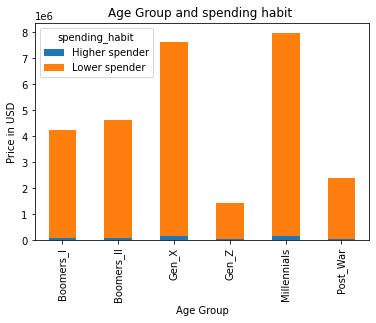

In [144]:
# Creating a bar chart of results sorted highest to lowest spending habit
crosstab_agegroup_spending_graph = crosstab_agegroup_spendinghabit.plot(kind='bar', stacked=True)
plt.title('Age Group and spending habit ')
plt.xlabel('Age Group')
plt.ylabel('Price in USD')
plt.show()

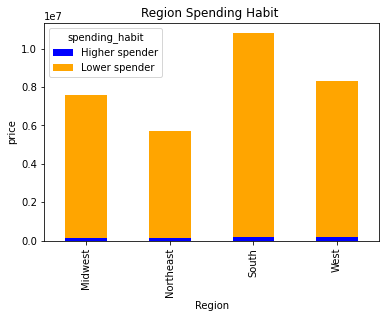

In [145]:
crosstab_region_spenders_type_graph = crosstab_region_spenders_type.plot(kind='bar', stacked=True, color = ['blue','orange', 'green', 'red'])
plt.title('Region Spending Habit ')
plt.xlabel('Region')
plt.ylabel('price')
plt.show()

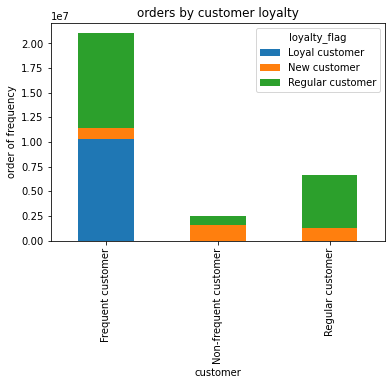

In [146]:
crosstab_ordfreq_loyalty_graph = crosstab_ordfreq_loyalty.plot(kind='bar', stacked=True)
plt.title('orders by customer loyalty')
plt.xlabel('customer')
plt.ylabel('order of frequency')
plt.show()

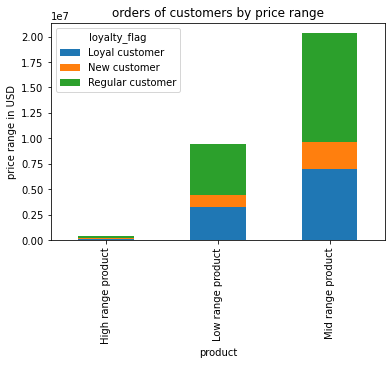

In [147]:
crosstab_loyalty_pricrange_grph = crosstab_loyalty_pricrange.plot(kind='bar', stacked=True)
plt.title('orders of customers by price range')
plt.xlabel('product')
plt.ylabel('price range in USD')
plt.show()

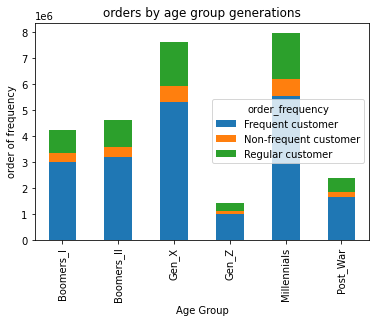

In [148]:
#bar chart for age group and order of frequency
crosstab_agegene_ordfreq_grp = crosstab_agegene_ordfreq.plot(kind='bar', stacked=True)
plt.title('orders by age group generations')
plt.xlabel('Age Group')
plt.ylabel('order of frequency')
plt.show()

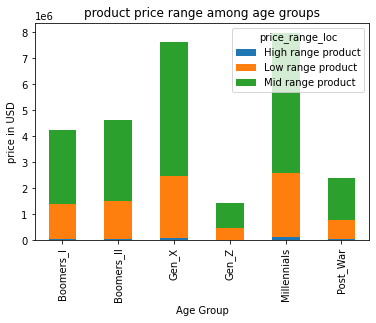

In [149]:
#bar chart for age group and price range
crosstab_agegene_pricerang_grp = crosstab_agegene_pricerang.plot(kind='bar', stacked=True)
plt.title('product price range among age groups')
plt.xlabel('Age Group')
plt.ylabel('price in USD')
plt.show()

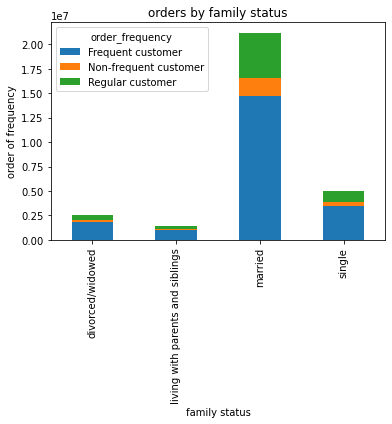

In [150]:
#bar chart family status and order of frequency
crosstab_famsta_ordfreq_graph = crosstab_famsta_ordfreq.plot(kind='bar', stacked=True)
plt.title('orders by family status')
plt.xlabel('family status')
plt.ylabel('order of frequency')
plt.show()

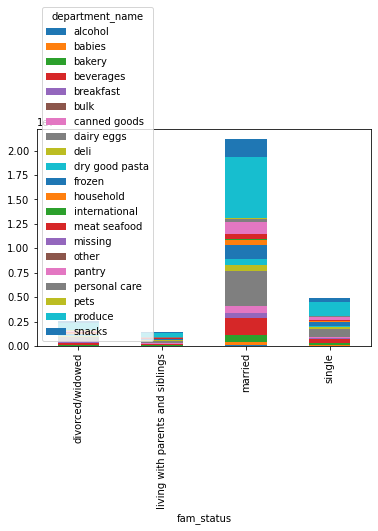

In [151]:
# bar chart family status and department ID
crosstab_famsta_deptid_graph = crosstab_famsta_deptid.plot(kind='bar', stacked=True)

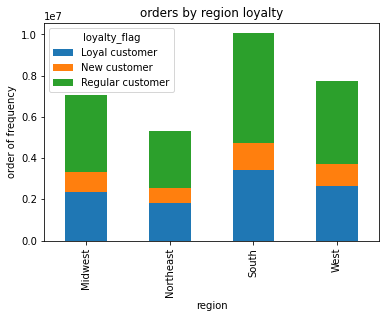

In [152]:
#bar chart showing the region and loyalty
crosstab_region_loyal_graph = crosstab_region_loyal.plot(kind='bar', stacked=True)
plt.title('orders by region loyalty')
plt.xlabel('region')
plt.ylabel('order of frequency')
plt.show()

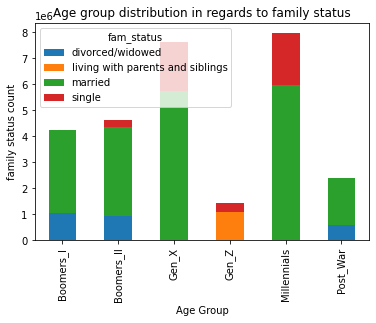

In [153]:
# bar chart of family and age group in regards to generation
fam_agegroupgen_graph = crosstab_fam_agegroup.plot(kind='bar', stacked=True)
plt.title('Age group distribution in regards to family status')
plt.xlabel('Age Group')
plt.ylabel('family status count')
plt.show()

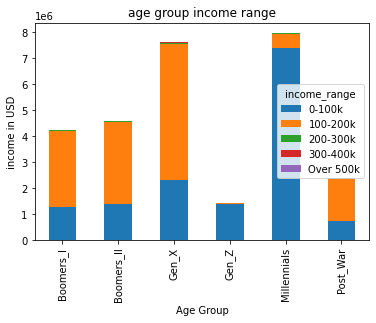

In [154]:
# bar chart showing agegroup and income
crosstab_agegen_income_graph = crosstab_agegen_income.plot(kind='bar', stacked=True)
plt.title('age group income range')
plt.xlabel('Age Group')
plt.ylabel('income in USD')
plt.show()

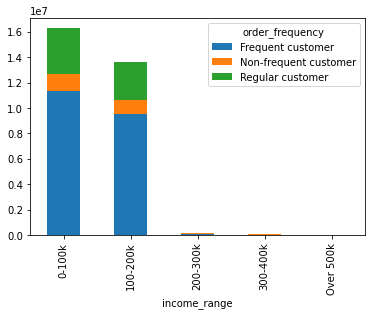

In [155]:
# bar chart showing income and order of frequency
crosstab_income_ordfreq_graph = crosstab_income_ordfreq.plot(kind='bar', stacked=True)

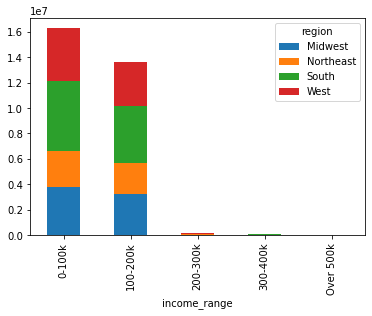

In [156]:
# icnome and region bar chart
crosstab_increg_graph = crosstab_increg.plot(kind='bar', stacked=True)

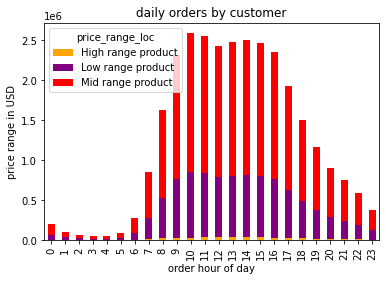

In [157]:
#order hour of day and price range bar
crosstab_ordhr_prange_graph = crosstab_ordhr_prange.plot(kind='bar', stacked=True, color = ['orange', 'purple', 'red'])
plt.title('daily orders by customer')
plt.xlabel('order hour of day')
plt.ylabel('price range in USD')
plt.show()

In [158]:
#Exporting chart time of day/prices
crosstab_ordhr_prange_graph.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked time of day price range.png'))

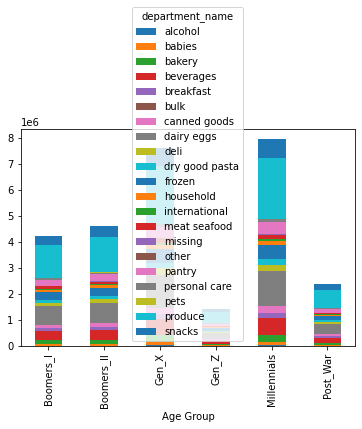

In [159]:
# bar chart shoing age and department ID
crosstab_agedept_graph = crosstab_agedept.plot(kind='bar', stacked=True)

In [160]:
# Creating a pie chart showing distrubution of price range products sold
new_customer_list['price_range_loc'].value_counts()

Mid range product     20357406
Low range product      9427297
High range product      386721
Name: price_range_loc, dtype: int64

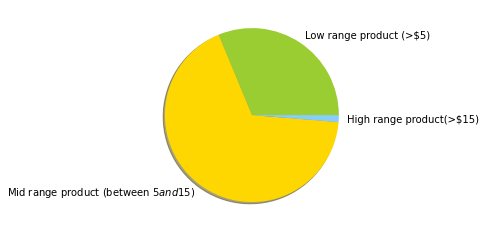

In [161]:
# pie chart showing the distributio of price range of products sold
mylabels = ['Low range product (>$5)', 'Mid range product (between $5 and $15)', 'High range product(>$15)']
sizes = [9427297, 20357406, 386721]
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels = mylabels, shadow = True, colors=colors)
plt.show()

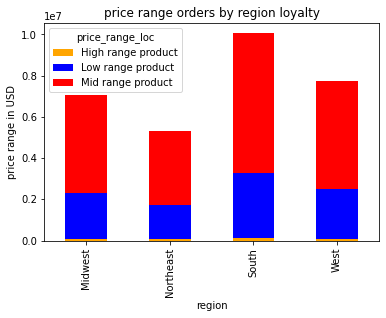

In [162]:
#price purchase by region
crosstab_region_pric.plot.bar(stacked = True, color = ['orange', 'blue', 'red'])
plt.title('price range orders by region loyalty')
plt.xlabel('region')
plt.ylabel('price range in USD')
plt.show()

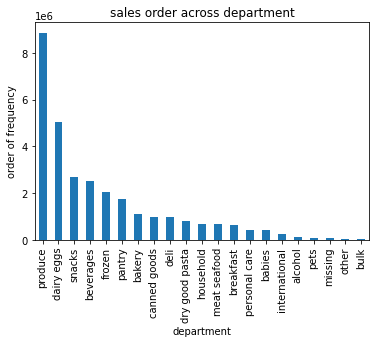

In [163]:
#Sales by department
new_customer_list['department_name'].value_counts().plot.bar()
plt.title('sales order across department')
plt.xlabel('department')
plt.ylabel('order of frequency')
plt.show()

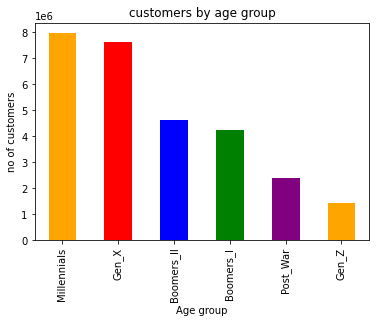

In [164]:
#A breakdown of customers by age group regards to generation
new_customer_list['Age Group'].value_counts().plot.bar(color = ['orange','red', 'blue', 'green', 'purple'])
plt.title('customers by age group')
plt.xlabel('Age group')
plt.ylabel('no of customers')
plt.show()

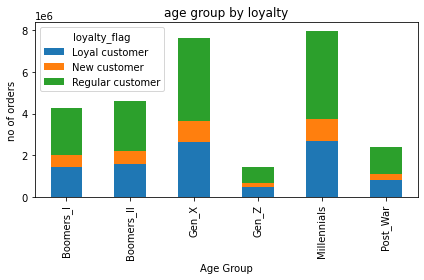

In [165]:
#Graph showing correlation between age group and loyalty
crosstab_genage_loyal.plot.bar(stacked=True)
plt.title('age group by loyalty')
plt.xlabel('Age Group')
plt.ylabel('no of orders')
plt.tight_layout()
plt.show()

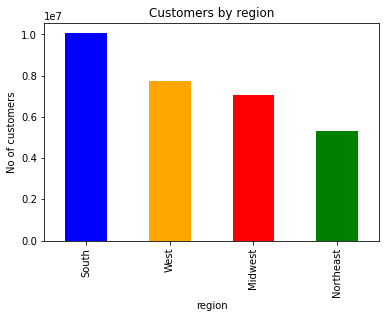

In [166]:
#Breakdown  of region
new_customer_list['region'].value_counts().plot.bar(color = ['blue', 'orange', 'red', 'green'])
plt.title('Customers by region')
plt.xlabel('region')
plt.ylabel('No of customers')
plt.show()

In [167]:
# Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
new_customer_list.groupby('Age Group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
Age Group                           
Boomers_I    11.652070  1.0  99999.0
Boomers_II   11.635599  1.0  99999.0
Gen_X        12.079842  1.0  99999.0
Gen_Z        10.240681  1.0  99999.0
Millennials  11.744851  1.0  99999.0
Post_War     11.553970  1.0  99999.0

In [168]:
new_customer_list.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_range                          
0-100k          8.099410  1.0  99999.0
100-200k       12.041896  1.0  99999.0
200-300k      237.598637  1.0  99999.0
300-400k      298.181817  1.0  99999.0
Over 500k     169.090060  1.0  99999.0

In [169]:
#aggregate region
new_customer_list.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.656311  1.0  99999.0
Northeast  11.420964  1.0  99999.0
South      12.108934  1.0  99999.0
West       11.102326  1.0  99999.0

In [170]:
#line chart for customers age group and income
#Line chart for Customers age that have most income already analysed in the previous exercise. i can't continue running the code here due to memory error

In [171]:
np.random.seed(4)

In [172]:
#Creating a list holding True/False values to test the np.random.rand(),=0.7
dev = np.random.rand(len(new_customer_list)) <= 0.7

In [173]:
#store 70% of the sample in data frame
big = new_customer_list[dev]

MemoryError: Unable to allocate 4.05 GiB for an array with shape (18, 30171424) and data type object

In [174]:
# Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [175]:
#Answer... Graph and comparison is being shown in excel

In [176]:
# Question 9: Produce suitable charts to illustrate your results and export them in your project folder.
#Answer: Graphs and comparisons shown in attached Excel spreadsheet

In [177]:
# Question 10: Tidy up your script, export your final data set, and save your notebook.